In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import warnings
warnings.filterwarnings('ignore')
plt.style.use('ggplot')

In [ ]:
data_dir = '/content/drive/MyDrive/Colab Notebooks/recruit-restaurant-visitor-forecasting/data'
os.listdir(data_dir)

['hpg_store_info.csv',
 'air_store_info.csv',
 'air_reserve.csv',
 'hpg_reserve.csv',
 'date_info.csv',
 'air_visit_data.csv',
 'store_id_relation.csv',
 'sample_submission.csv']

In [ ]:
air_reserve = pd.read_csv(data_dir + '/air_reserve.csv')
hpg_reserve = pd.read_csv(data_dir + '/hpg_reserve.csv')
air_store = pd.read_csv(data_dir + '/air_store_info.csv')
hpg_store = pd.read_csv(data_dir + '/hpg_store_info.csv')
store_id = pd.read_csv(data_dir + '/store_id_relation.csv')
air_visit = pd.read_csv(data_dir + '/air_visit_data.csv')
date_info = pd.read_csv(data_dir + '/date_info.csv')
submission = pd.read_csv(data_dir + '/sample_submission.csv')

In [ ]:
# 데이터 살펴보는 함수
def data_look(df):
    display(df.tail())
    print()
    for col in df.columns:
        print(f'{col}: {df[col].nunique()}') # 컬럼별 unique values 개수
    print()
    display(df.isna().sum()) # 결측치 확인
    print()

# 데이터 살펴보기

## air_visit

In [ ]:
data_look(air_visit)

,air_store_id,visit_date,visitors
252103,air_24e8414b9b07decb,2017-04-18,6
252104,air_24e8414b9b07decb,2017-04-19,6
252105,air_24e8414b9b07decb,2017-04-20,7
252106,air_24e8414b9b07decb,2017-04-21,8
252107,air_24e8414b9b07decb,2017-04-22,5



air_store_id: 829
visit_date: 478
visitors: 204



air_store_id    0
visit_date      0
visitors        0
dtype: int64

In [ ]:
air_visit['visit_date'].agg(['min', 'max'])

min    2016-01-01
max    2017-04-22
Name: visit_date, dtype: object

In [ ]:
# datetime 변환
air_visit['visit_date'] = pd.to_datetime(air_visit['visit_date'])
air_visit['visit_day'] = air_visit['visit_date'].dt.dayofweek
air_visit['visit_month'] = air_visit['visit_date'].dt.month
air_visit.tail()

,air_store_id,visit_date,visitors,visit_day,visit_month
252103,air_24e8414b9b07decb,2017-04-18,6,1,4
252104,air_24e8414b9b07decb,2017-04-19,6,2,4
252105,air_24e8414b9b07decb,2017-04-20,7,3,4
252106,air_24e8414b9b07decb,2017-04-21,8,4,4
252107,air_24e8414b9b07decb,2017-04-22,5,5,4


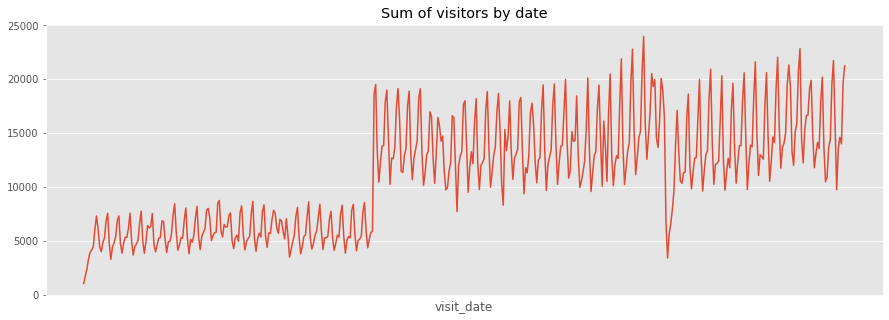

In [ ]:
# 날짜별 고객 수 합계
air_visit_sum = air_visit.groupby('visit_date')['visitors'].sum()
plt.figure(figsize=(15,5))
sns.lineplot(x=air_visit_sum.index, y=air_visit_sum.values)
plt.title('Sum of visitors by date')
plt.xticks([])
plt.show()

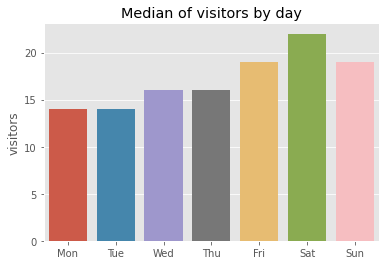

In [ ]:
# 요일별 고객 수 중앙값
air_day_visit = air_visit.groupby('visit_day')['visitors'].median()
days = 'Mon Tue Wed Thu Fri Sat Sun'.split()
sns.barplot(x=days, y=air_day_visit)
plt.title('Median of visitors by day')
plt.show()

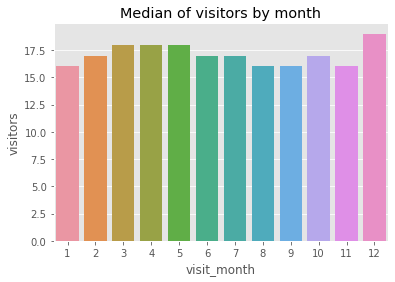

In [ ]:
# 월별 고객 수 중앙값
air_month_visit = air_visit.groupby('visit_month')['visitors'].median()
sns.barplot(x=air_month_visit.index, y=air_month_visit)
plt.title('Median of visitors by month')
plt.show()

In [ ]:
# 매장별, 날짜별 고객 수
air_id_visit = air_visit.groupby(['air_store_id', 'visit_date'])['visitors'].sum().reset_index()
air_visit_pivot = air_id_visit.pivot_table('visitors', index='air_store_id', columns='visit_date').fillna(0)
air_visit_pivot

visit_date,2016-01-01,2016-01-02,2016-01-03,2016-01-04,2016-01-05,2016-01-06,2016-01-07,2016-01-08,2016-01-09,2016-01-10,2016-01-11,2016-01-12,2016-01-13,2016-01-14,2016-01-15,2016-01-16,2016-01-17,2016-01-18,2016-01-19,2016-01-20,2016-01-21,2016-01-22,2016-01-23,2016-01-24,2016-01-25,2016-01-26,2016-01-27,2016-01-28,2016-01-29,2016-01-30,2016-01-31,2016-02-01,2016-02-02,2016-02-03,2016-02-04,2016-02-05,2016-02-06,2016-02-07,2016-02-08,2016-02-09,...,2017-03-14,2017-03-15,2017-03-16,2017-03-17,2017-03-18,2017-03-19,2017-03-20,2017-03-21,2017-03-22,2017-03-23,2017-03-24,2017-03-25,2017-03-26,2017-03-27,2017-03-28,2017-03-29,2017-03-30,2017-03-31,2017-04-01,2017-04-02,2017-04-03,2017-04-04,2017-04-05,2017-04-06,2017-04-07,2017-04-08,2017-04-09,2017-04-10,2017-04-11,2017-04-12,2017-04-13,2017-04-14,2017-04-15,2017-04-16,2017-04-17,2017-04-18,2017-04-19,2017-04-20,2017-04-21,2017-04-22
air_store_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
air_00a91d42b08b08d9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,28.0,42.0,39.0,37.0,4.0,0.0,0.0,28.0,23.0,27.0,34.0,7.0,0.0,43.0,30.0,52.0,33.0,38.0,7.0,0.0,33.0,17.0,35.0,29.0,17.0,9.0,0.0,17.0,43.0,28.0,34.0,39.0,0.0,0.0,19.0,35.0,17.0,38.0,55.0,18.0
air_0164b9927d20bcc3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,14.0,11.0,5.0,15.0,6.0,0.0,0.0,0.0,18.0,10.0,18.0,1.0,0.0,11.0,11.0,6.0,14.0,4.0,11.0,0.0,13.0,16.0,20.0,6.0,6.0,1.0,0.0,10.0,8.0,2.0,13.0,7.0,1.0,0.0,2.0,1.0,8.0,1.0,26.0,6.0
air_0241aa3964b7f861,0.0,0.0,10.0,9.0,17.0,10.0,0.0,5.0,8.0,16.0,16.0,8.0,9.0,4.0,4.0,29.0,10.0,6.0,7.0,10.0,14.0,10.0,3.0,6.0,7.0,9.0,6.0,0.0,1.0,14.0,11.0,6.0,3.0,11.0,0.0,5.0,16.0,5.0,9.0,10.0,...,5.0,7.0,0.0,6.0,13.0,12.0,7.0,6.0,4.0,0.0,8.0,14.0,6.0,11.0,11.0,3.0,2.0,10.0,7.0,13.0,5.0,4.0,7.0,0.0,12.0,4.0,10.0,11.0,5.0,13.0,0.0,4.0,15.0,10.0,12.0,19.0,8.0,0.0,3.0,13.0
air_0328696196e46f18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,6.0,5.0,0.0,29.0,8.0,13.0,15.0,24.0,0.0,0.0,0.0,2.0,0.0,4.0,7.0,5.0,11.0,0.0,6.0,3.0,5.0,0.0,0.0,0.0,0.0,0.0,6.0,8.0,0.0,9.0,4.0,3.0,3.0,0.0,24.0,0.0,19.0,8.0
air_034a3d5b40d5b1b1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,28.0,18.0,20.0,18.0,33.0,42.0,66.0,12.0,7.0,21.0,22.0,15.0,25.0,15.0,16.0,14.0,25.0,16.0,20.0,30.0,6.0,14.0,18.0,6.0,19.0,40.0,37.0,9.0,8.0,16.0,22.0,18.0,31.0,39.0,25.0,20.0,31.0,12.0,37.0,35.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
air_fea5dc9594450608,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,8.0,26.0,7.0,28.0,23.0,7.0,0.0,8.0,21.0,22.0,6.0,13.0,35.0,4.0,14.0,14.0,3.0,9.0,33.0,13.0,8.0,12.0,16.0,3.0,23.0,31.0,7.0,2.0,15.0,15.0,17.0,20.0,20.0,15.0,9.0,16.0,17.0,23.0,28.0,14.0
air_fee8dcf4d619598e,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,13.0,19.0,28.0,14.0,16.0,28.0,14.0,26.0,27.0,21.0,30.0,45.0,24.0,27.0,29.0,22.0,22.0,30.0,38.0,24.0,21.0,17.0,27.0,23.0,32.0,31.0,30.0,12.0,17.0,14.0,11.0,37.0,47.0,32.0,15.0,22.0,32.0,26.0,27.0,53.0
air_fef9ccb3ba0da2f7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [ ]:
air_visit_pivot.T.describe().T

,count,mean,std,min,25%,50%,75%,max
air_store_id,,,,,,,,
air_00a91d42b08b08d9,478.0,12.658996,15.657726,0.0,0.0,0.0,26.00,99.0
air_0164b9927d20bcc3,478.0,2.882845,5.558426,0.0,0.0,0.0,3.00,27.0
air_0241aa3964b7f861,478.0,8.198745,6.777401,0.0,3.0,7.0,11.75,48.0
air_0328696196e46f18,478.0,1.926778,4.747820,0.0,0.0,0.0,0.00,41.0
air_034a3d5b40d5b1b1,478.0,7.786611,12.067962,0.0,0.0,1.0,12.75,116.0
...,...,...,...,...,...,...,...,...
air_fea5dc9594450608,478.0,8.303347,9.646913,0.0,0.0,5.5,14.75,44.0
air_fee8dcf4d619598e,478.0,15.682008,14.844665,0.0,0.0,15.0,28.75,53.0
air_fef9ccb3ba0da2f7,478.0,4.930962,6.165897,0.0,0.0,1.0,8.75,30.0


## air_reserve

In [ ]:
data_look(air_reserve)

,air_store_id,visit_datetime,reserve_datetime,reserve_visitors
92373,air_db4b38ebe7a7ceff,2017-05-29 18:00:00,2017-04-17 19:00:00,6
92374,air_1033310359ceeac1,2017-05-30 23:00:00,2017-04-19 17:00:00,8
92375,air_877f79706adbfb06,2017-05-31 20:00:00,2017-04-12 23:00:00,3
92376,air_900d755ebd2f7bbd,2017-05-31 20:00:00,2017-04-19 16:00:00,10
92377,air_3cad29d1a23209d2,2017-05-31 21:00:00,2017-04-22 10:00:00,3



air_store_id: 314
visit_datetime: 4975
reserve_datetime: 7513
reserve_visitors: 71



air_store_id        0
visit_datetime      0
reserve_datetime    0
reserve_visitors    0
dtype: int64

In [ ]:
air_reserve['visit_datetime'].agg(['min', 'max'])

min    2016-01-01 19:00:00
max    2017-05-31 21:00:00
Name: visit_datetime, dtype: object

In [ ]:
air_reserve['reserve_datetime'].agg(['min', 'max'])

min    2016-01-01 01:00:00
max    2017-04-22 23:00:00
Name: reserve_datetime, dtype: object

In [ ]:
air_reserve['visit_datetime'] = pd.to_datetime(air_reserve['visit_datetime'])
air_reserve['visit_date'] = air_reserve['visit_datetime'].dt.date

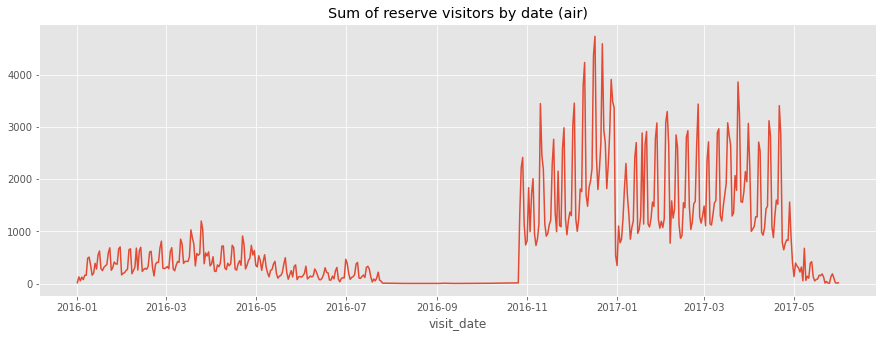

In [ ]:
# 날짜별 예약인원 합계
air_reserve_sum = air_reserve.groupby('visit_date')['reserve_visitors'].sum()
plt.figure(figsize=(15,5))
sns.lineplot(x=air_reserve_sum.index, y=air_reserve_sum.values)
plt.title('Sum of reserve visitors by date (air)')
plt.show()

In [ ]:
# 각 매장의 날짜별 예약인원 합계(병합용)
air_id_reserve = air_reserve.groupby(['air_store_id', 'visit_date'])['reserve_visitors'].sum().reset_index()
air_id_reserve.tail()

,air_store_id,visit_date,reserve_visitors
29825,air_fea5dc9594450608,2017-04-22,2
29826,air_fea5dc9594450608,2017-04-25,2
29827,air_fea5dc9594450608,2017-04-28,3
29828,air_fea5dc9594450608,2017-05-20,6
29829,air_fee8dcf4d619598e,2017-01-09,5


## air_store

In [ ]:
data_look(air_store)

,air_store_id,air_genre_name,air_area_name,latitude,longitude
824,air_9bf595ef095572fb,International cuisine,Tōkyō-to Shibuya-ku Shibuya,35.661777,139.704051
825,air_764f71040a413d4d,Asian,Tōkyō-to Shibuya-ku Shibuya,35.661777,139.704051
826,air_10bbe8acd943d8f6,Asian,Tōkyō-to Shibuya-ku Shibuya,35.661777,139.704051
827,air_7514d90009613cd6,Karaoke/Party,Hokkaidō Sapporo-shi Minami 3 Jōnishi,43.055460,141.340956
828,air_c8fe396d6c46275d,Karaoke/Party,Hokkaidō Sapporo-shi Minami 3 Jōnishi,43.055460,141.340956



air_store_id: 829
air_genre_name: 14
air_area_name: 103
latitude: 108
longitude: 108



air_store_id      0
air_genre_name    0
air_area_name     0
latitude          0
longitude         0
dtype: int64

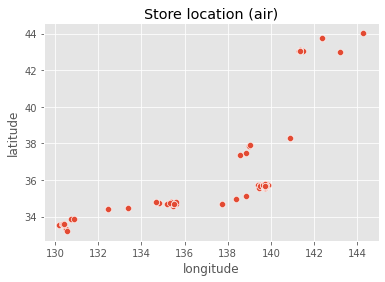

In [ ]:
# 위경도 시각화
sns.scatterplot(x='longitude', y='latitude', data=air_store)
plt.title('Store location (air)')
plt.show()

In [ ]:
# 장르별 매장 수
air_store['air_genre_name'].value_counts()

Izakaya                         197
Cafe/Sweets                     181
Dining bar                      108
Italian/French                  102
Bar/Cocktail                     79
Japanese food                    63
Other                            27
Yakiniku/Korean food             23
Western food                     16
Okonomiyaki/Monja/Teppanyaki     14
Creative cuisine                 13
Asian                             2
International cuisine             2
Karaoke/Party                     2
Name: air_genre_name, dtype: int64

In [ ]:
# 지역별 매장 수
air_store['air_area'] = air_store['air_area_name'].map(lambda x: x.split()[0])
air_store['air_area'].value_counts()

Tōkyō-to         444
Fukuoka-ken      127
Ōsaka-fu          74
Hyōgo-ken         57
Hokkaidō          46
Hiroshima-ken     32
Shizuoka-ken      18
Miyagi-ken        17
Niigata-ken       14
Name: air_area, dtype: int64

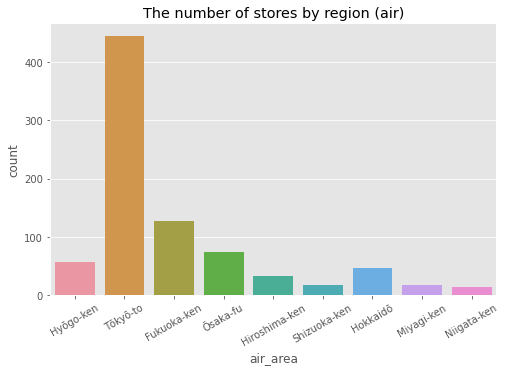

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(air_store['air_area'])
plt.xticks(rotation=30)
plt.title('The number of stores by region (air)')
plt.show()

## hpg_reserve

In [ ]:
data_look(hpg_reserve)

,hpg_store_id,visit_datetime,reserve_datetime,reserve_visitors
2000315,hpg_2b293477ea4642fb,2017-05-31 20:00:00,2017-04-19 07:00:00,2
2000316,hpg_f922aeca48ca5a29,2017-05-31 20:00:00,2017-03-19 00:00:00,3
2000317,hpg_e9151de687b93aa3,2017-05-31 21:00:00,2017-04-14 20:00:00,49
2000318,hpg_fae6c96189b4a122,2017-05-31 21:00:00,2017-04-19 17:00:00,9
2000319,hpg_0b70de808b55ad1e,2017-05-31 23:00:00,2017-04-21 13:00:00,6



hpg_store_id: 13325
visit_datetime: 9847
reserve_datetime: 11450
reserve_visitors: 99



hpg_store_id        0
visit_datetime      0
reserve_datetime    0
reserve_visitors    0
dtype: int64

In [ ]:
hpg_reserve['visit_datetime'].agg(['min', 'max'])

min    2016-01-01 11:00:00
max    2017-05-31 23:00:00
Name: visit_datetime, dtype: object

In [ ]:
hpg_reserve['reserve_datetime'].agg(['min', 'max'])

min    2016-01-01 00:00:00
max    2017-04-22 23:00:00
Name: reserve_datetime, dtype: object

In [ ]:
hpg_reserve['visit_datetime'] = pd.to_datetime(hpg_reserve['visit_datetime'])
hpg_reserve['visit_date'] = hpg_reserve['visit_datetime'].dt.date

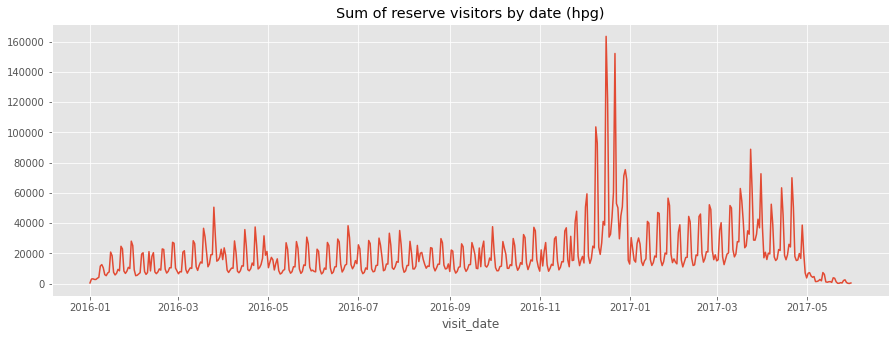

In [ ]:
# 날짜별 예약인원 합계
hpg_reserve_sum = hpg_reserve.groupby('visit_date')['reserve_visitors'].sum()
plt.figure(figsize=(15,5))
sns.lineplot(x=hpg_reserve_sum.index, y=hpg_reserve_sum.values)
plt.title('Sum of reserve visitors by date (hpg)')
plt.show()

In [ ]:
# 각 매장의 날짜별 예약인원 합계(병합용)
hpg_id_reserve = hpg_reserve.groupby(['hpg_store_id', 'visit_date'])['reserve_visitors'].sum().reset_index()
hpg_id_reserve.tail()

,hpg_store_id,visit_date,reserve_visitors
1355048,hpg_fffc097dce87af3e,2017-03-10,2
1355049,hpg_fffc097dce87af3e,2017-03-17,2
1355050,hpg_fffc097dce87af3e,2017-03-27,5
1355051,hpg_fffc097dce87af3e,2017-04-21,3
1355052,hpg_fffc097dce87af3e,2017-04-23,8


## hpg_store

In [ ]:
data_look(hpg_store)

,hpg_store_id,hpg_genre_name,hpg_area_name,latitude,longitude
4685,hpg_c6ed353a48c7c93e,Sichuan food,Tōkyō-to Chiyoda-ku None,35.695780,139.768453
4686,hpg_a58d2423360b2fb4,Sichuan food,Tōkyō-to Minato-ku Roppongi,35.666137,139.733978
4687,hpg_d2021704076cdd70,Shanghai food,Tōkyō-to Chiyoda-ku None,35.695780,139.768453
4688,hpg_602472570d65e219,Spain/Mediterranean cuisine,Tōkyō-to Toshima-ku None,35.730068,139.711742
4689,hpg_11801306ce8bfb4f,Udon/Soba,Osaka Prefecture Osaka None,34.701519,135.498859



hpg_store_id: 4690
hpg_genre_name: 34
hpg_area_name: 119
latitude: 129
longitude: 129



hpg_store_id      0
hpg_genre_name    0
hpg_area_name     0
latitude          0
longitude         0
dtype: int64

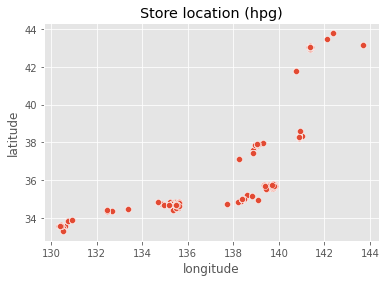

In [ ]:
# 위경도 시각화
sns.scatterplot(x='longitude', y='latitude', data=hpg_store)
plt.title('Store location (hpg)')
plt.show()

In [ ]:
# 장르별 매장 수
hpg_store['hpg_genre_name'].value_counts()

Japanese style                  1750
International cuisine            700
Creation                         410
Seafood                          339
Grilled meat                     325
Italian                          249
Spain Bar/Italian Bar            229
Chinese general                   91
Japanese food in general          85
Japanese cuisine/Kaiseki          64
Creative Japanese food            60
Karaoke                           60
Shabu-shabu/Sukiyaki              59
Okonomiyaki/Monja/Teppanyaki      44
Party                             40
Korean cuisine                    38
French                            27
Steak/Hamburger/Curry             24
Bistro                            22
Cafe                              16
Sushi                             11
Pasta/Pizza                       10
Bar/Cocktail                       7
Thai/Vietnamese food               5
Amusement bar                      5
Western food                       5
Cantonese food                     4
S

In [ ]:
# 지역별 매장 수
hpg_store['hpg_area'] = hpg_store['hpg_area_name'].map(lambda x: x.split()[0])
hpg_store['hpg_area'].value_counts()

Tōkyō-to         2076
Ōsaka-fu          514
Fukuoka-ken       380
Hyōgo-ken         331
Hokkaidō          298
Hiroshima-ken     245
Shizuoka-ken      231
Osaka             145
Niigata-ken       142
Miyagi-ken        139
None              117
Kanagawa-ken       61
Saitama-ken        11
Name: hpg_area, dtype: int64

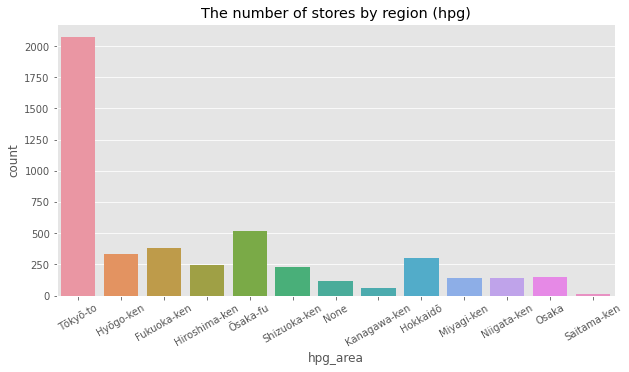

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(hpg_store['hpg_area'])
plt.xticks(rotation=30)
plt.title('The number of stores by region (hpg)')
plt.show()

## store_id_relation

In [ ]:
data_look(store_id)

,air_store_id,hpg_store_id
145,air_b8925441167c3152,hpg_0cc0abae3a8b52de
146,air_f8233ad00755c35c,hpg_098e4dd30e54fee6
147,air_6607fe3671242ce3,hpg_1004356dc8ab69ec
148,air_ccd19a5bc5573ae5,hpg_df22bf146d2c7e19
149,air_465bddfed3353b23,hpg_23c5945dc1a72454



air_store_id: 150
hpg_store_id: 150



air_store_id    0
hpg_store_id    0
dtype: int64

In [ ]:
store_id['air_store_id'].isin(air_store['air_store_id']).value_counts()

True    150
Name: air_store_id, dtype: int64

In [ ]:
store_id['hpg_store_id'].isin(hpg_store['hpg_store_id']).value_counts()

False    87
True     63
Name: hpg_store_id, dtype: int64

In [ ]:
air_store[air_store['air_store_id'] == store_id.loc[1]['air_store_id']]

,air_store_id,air_genre_name,air_area_name,latitude,longitude,air_area
172,air_a24bf50c3e90d583,Dining bar,Shizuoka-ken Hamamatsu-shi Motoshirochō,34.710895,137.72594,Shizuoka-ken


In [ ]:
hpg_store[hpg_store['hpg_store_id'] == store_id.loc[1]['hpg_store_id']]

,hpg_store_id,hpg_genre_name,hpg_area_name,latitude,longitude,hpg_area
1845,hpg_c34b496d0305a809,Italian,Shizuoka-ken Hamamatsu-shi Sukenobuchō,34.721644,137.738944,Shizuoka-ken


## date_info

In [ ]:
data_look(date_info)

,calendar_date,day_of_week,holiday_flg
512,2017-05-27,Saturday,0
513,2017-05-28,Sunday,0
514,2017-05-29,Monday,0
515,2017-05-30,Tuesday,0
516,2017-05-31,Wednesday,0



calendar_date: 517
day_of_week: 7
holiday_flg: 2



calendar_date    0
day_of_week      0
holiday_flg      0
dtype: int64

In [ ]:
date_info['calendar_date'].agg(['min', 'max'])

min    2016-01-01
max    2017-05-31
Name: calendar_date, dtype: object

In [ ]:
date_info['holiday_flg'].value_counts()

0    482
1     35
Name: holiday_flg, dtype: int64

In [ ]:
date_info[date_info['holiday_flg'] == 1]

,calendar_date,day_of_week,holiday_flg
0,2016-01-01,Friday,1
1,2016-01-02,Saturday,1
2,2016-01-03,Sunday,1
10,2016-01-11,Monday,1
41,2016-02-11,Thursday,1
79,2016-03-20,Sunday,1
80,2016-03-21,Monday,1
119,2016-04-29,Friday,1
123,2016-05-03,Tuesday,1
124,2016-05-04,Wednesday,1


## submission

In [ ]:
submission.tail()

,id,visitors
32014,air_fff68b929994bfbd_2017-05-27,0
32015,air_fff68b929994bfbd_2017-05-28,0
32016,air_fff68b929994bfbd_2017-05-29,0
32017,air_fff68b929994bfbd_2017-05-30,0
32018,air_fff68b929994bfbd_2017-05-31,0


In [ ]:
submission_copy = submission.copy()

In [ ]:
submission['air_store_id'] = submission['id'].map(lambda x: x[:-11])
submission['visit_date'] = submission['id'].map(lambda x: x[-10:])

In [ ]:
data_look(submission)

,id,visitors,air_store_id,visit_date
32014,air_fff68b929994bfbd_2017-05-27,0,air_fff68b929994bfbd,2017-05-27
32015,air_fff68b929994bfbd_2017-05-28,0,air_fff68b929994bfbd,2017-05-28
32016,air_fff68b929994bfbd_2017-05-29,0,air_fff68b929994bfbd,2017-05-29
32017,air_fff68b929994bfbd_2017-05-30,0,air_fff68b929994bfbd,2017-05-30
32018,air_fff68b929994bfbd_2017-05-31,0,air_fff68b929994bfbd,2017-05-31



id: 32019
visitors: 1
air_store_id: 821
visit_date: 39



id              0
visitors        0
air_store_id    0
visit_date      0
dtype: int64

In [ ]:
submission['visit_date'].agg(['min', 'max'])

min    2017-04-23
max    2017-05-31
Name: visit_date, dtype: object

In [ ]:
submission['air_store_id'].isin(air_visit['air_store_id']).value_counts()

True    32019
Name: air_store_id, dtype: int64

# 데이터프레임 합치기

In [ ]:
air_data = air_id_reserve.merge(air_store, on='air_store_id')
air_data.tail()

,air_store_id,visit_date,reserve_visitors,air_genre_name,air_area_name,latitude,longitude,air_area
29825,air_fea5dc9594450608,2017-04-22,2,Other,Shizuoka-ken Hamamatsu-shi Motoshirochō,34.710895,137.725940,Shizuoka-ken
29826,air_fea5dc9594450608,2017-04-25,2,Other,Shizuoka-ken Hamamatsu-shi Motoshirochō,34.710895,137.725940,Shizuoka-ken
29827,air_fea5dc9594450608,2017-04-28,3,Other,Shizuoka-ken Hamamatsu-shi Motoshirochō,34.710895,137.725940,Shizuoka-ken
29828,air_fea5dc9594450608,2017-05-20,6,Other,Shizuoka-ken Hamamatsu-shi Motoshirochō,34.710895,137.725940,Shizuoka-ken
29829,air_fee8dcf4d619598e,2017-01-09,5,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852,Hyōgo-ken


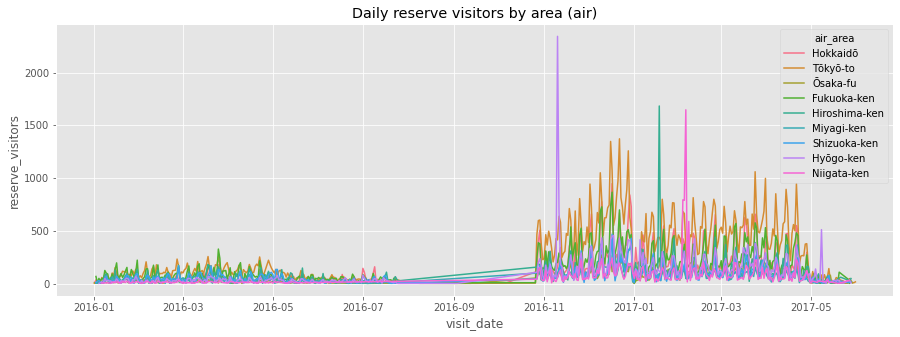

In [ ]:
# 날짜별, 지역별 예약인원 추이
air_region_reserve = air_data.groupby(['visit_date', 'air_area'])['reserve_visitors'].sum().reset_index()
plt.figure(figsize=(15,5))
sns.lineplot(x='visit_date', y='reserve_visitors', hue='air_area', data=air_region_reserve)
plt.title('Daily reserve visitors by area (air)')
plt.show()

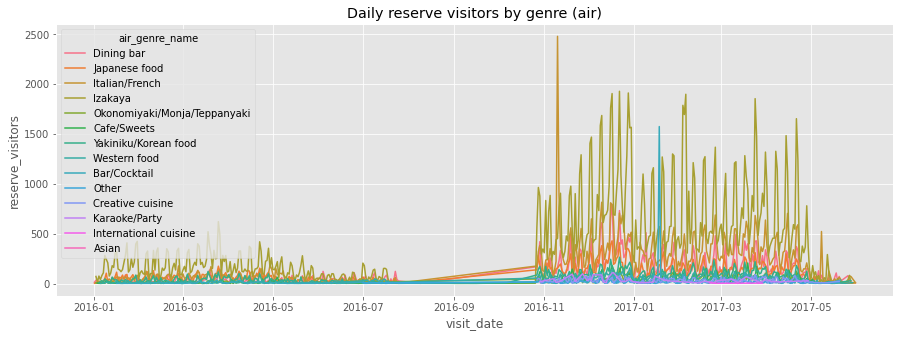

In [ ]:
# 날짜별, 장르별 예약인원 추이
air_genre_reserve = air_data.groupby(['visit_date', 'air_genre_name'])['reserve_visitors'].sum().reset_index()
plt.figure(figsize=(15,5))
sns.lineplot(x='visit_date', y='reserve_visitors', hue='air_genre_name', data=air_genre_reserve)
plt.title('Daily reserve visitors by genre (air)')
plt.show()

In [ ]:
air_merge = air_visit.merge(air_data, on=['air_store_id', 'visit_date'], how='left')
air_merge.tail()

,air_store_id,visit_date,visitors,reserve_visitors,air_genre_name,air_area_name,latitude,longitude,air_area
252103,air_24e8414b9b07decb,2017-04-18,6,NaN,NaN,NaN,NaN,NaN,NaN
252104,air_24e8414b9b07decb,2017-04-19,6,NaN,NaN,NaN,NaN,NaN,NaN
252105,air_24e8414b9b07decb,2017-04-20,7,NaN,NaN,NaN,NaN,NaN,NaN
252106,air_24e8414b9b07decb,2017-04-21,8,NaN,NaN,NaN,NaN,NaN,NaN
252107,air_24e8414b9b07decb,2017-04-22,5,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
hpg_data = hpg_id_reserve.merge(hpg_store, on='hpg_store_id')
hpg_data.tail()

,hpg_store_id,visit_date,reserve_visitors,hpg_genre_name,hpg_area_name,latitude,longitude,hpg_area
561104,hpg_ffe96ca8c6ec10cf,2017-03-31,8,Italian,Tōkyō-to Chūō-ku None,35.682504,139.773619,Tōkyō-to
561105,hpg_ffe96ca8c6ec10cf,2017-04-05,4,Italian,Tōkyō-to Chūō-ku None,35.682504,139.773619,Tōkyō-to
561106,hpg_ffe96ca8c6ec10cf,2017-04-07,11,Italian,Tōkyō-to Chūō-ku None,35.682504,139.773619,Tōkyō-to
561107,hpg_ffe96ca8c6ec10cf,2017-04-15,3,Italian,Tōkyō-to Chūō-ku None,35.682504,139.773619,Tōkyō-to
561108,hpg_ffe96ca8c6ec10cf,2017-04-24,16,Italian,Tōkyō-to Chūō-ku None,35.682504,139.773619,Tōkyō-to


In [ ]:
hpg_merge = store_id.merge(hpg_data, on='hpg_store_id')
hpg_merge.tail()

,air_store_id,hpg_store_id,visit_date,reserve_visitors,hpg_genre_name,hpg_area_name,latitude,longitude,hpg_area
8872,air_465bddfed3353b23,hpg_23c5945dc1a72454,2017-04-10,23,Spain Bar/Italian Bar,Tōkyō-to Shibuya-ku Ebisunishi,35.646745,139.707924,Tōkyō-to
8873,air_465bddfed3353b23,hpg_23c5945dc1a72454,2017-04-21,8,Spain Bar/Italian Bar,Tōkyō-to Shibuya-ku Ebisunishi,35.646745,139.707924,Tōkyō-to
8874,air_465bddfed3353b23,hpg_23c5945dc1a72454,2017-04-27,4,Spain Bar/Italian Bar,Tōkyō-to Shibuya-ku Ebisunishi,35.646745,139.707924,Tōkyō-to
8875,air_465bddfed3353b23,hpg_23c5945dc1a72454,2017-04-28,15,Spain Bar/Italian Bar,Tōkyō-to Shibuya-ku Ebisunishi,35.646745,139.707924,Tōkyō-to
8876,air_465bddfed3353b23,hpg_23c5945dc1a72454,2017-05-02,2,Spain Bar/Italian Bar,Tōkyō-to Shibuya-ku Ebisunishi,35.646745,139.707924,Tōkyō-to


In [ ]:
hpg_merge['air_store_id'].nunique()

63

In [ ]:
train = air_merge.merge(hpg_merge, on=['air_store_id', 'visit_date'], how='left')
train.tail()

,air_store_id,visit_date,visitors,reserve_visitors_x,air_genre_name,air_area_name,latitude_x,longitude_x,air_area,hpg_store_id,reserve_visitors_y,hpg_genre_name,hpg_area_name,latitude_y,longitude_y,hpg_area
252103,air_24e8414b9b07decb,2017-04-18,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
252104,air_24e8414b9b07decb,2017-04-19,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
252105,air_24e8414b9b07decb,2017-04-20,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
252106,air_24e8414b9b07decb,2017-04-21,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
252107,air_24e8414b9b07decb,2017-04-22,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
